In [13]:
import numpy as np
from PIL import Image
from sklearn.mixture import GaussianMixture
from PIL import Image
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
def load_tiff_stack(fname:str) -> np.array:
    img = Image.open(fname)
    
    frames = []
    for i in tqdm(range(np.min((img.n_frames, 2000)))):
        img.seek(i)
        frames.append(np.array(img))
      
    frames = np.stack(frames, axis=0)
    return frames

In [41]:
pixel_min = 1
pixel_max = 100

with open("./dataset.json", 'r') as f:
    dataset = json.load(f)

In [35]:
r = []
ys = []
for d in dataset['data']:
    gdd = int(d['gdd'])
    x = d['path']

    y = load_tiff_stack(x)
    y[y<0] = 0 # offset already subtracted by ScanImage during acquistion
    
    if len(y.shape) == 3:
        y_plot = y[0,:,:]
    else:
        y_plot = y

    r.append([gdd, np.nanmean(np.where(y>0, y, np.nan))]) # np.mean(y)
    ys.append([gdd, y_plot])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 90.92it/s]


In [36]:
r

[[10100, 18.499885105869208],
 [10350, 17.384120951736254],
 [10600, 17.44904789255103],
 [10850, 17.68687381766652],
 [11000, 17.925577837933076],
 [11350, 17.711524074486075],
 [11600, 17.968878397114164],
 [11800, 18.393254973913212],
 [9850, 19.595812616995147],
 [9600, 16.635486948969415],
 [9350, 17.789633129538906],
 [9100, 17.310600646605867],
 [8850, 16.227922289968177],
 [8600, 16.33821330413455],
 [8350, 29.38384484359084],
 [8100, 15.97572438552108],
 [7100, 18.363933280900604],
 [6100, 15.819361557068541],
 [5100, 15.573150510699822],
 [3100, 16.877482680805045],
 [1100, 17.63017399891445]]

In [37]:
gdd_summary = pd.DataFrame(r,columns=["GDD", "Mean Pixel Intensity"]).sort_values(by=['GDD'])

In [38]:
gdd_summary

,GDD,Mean Pixel Intensity
20,1100,17.630174
19,3100,16.877483
18,5100,15.573151
17,6100,15.819362
16,7100,18.363933
15,8100,15.975724
14,8350,29.383845
13,8600,16.338213
12,8850,16.227922
11,9100,17.310601


<Axes: title={'center': 'GDD compensation'}, xlabel='GDD'>

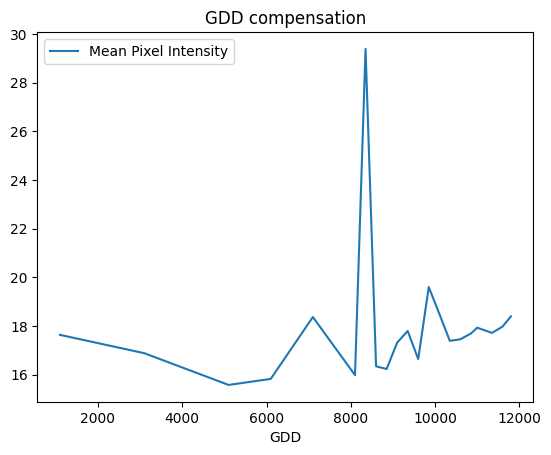

In [39]:
gdd_summary.plot.line(x="GDD", y="Mean Pixel Intensity", title="GDD compensation")

1100


(array([23890., 25357., 25473., 25928., 25950., 26181., 26523., 26328.,
        26053., 25636., 24973., 24223., 23585., 22481., 21729., 20980.,
        19630., 18908., 17830., 16761., 15781., 14771., 13933., 12978.,
        12035., 11292., 10400.,  9678.,  8811.,  8233.,  7572.,  6918.,
         6345.,  5715.,  5254.,  4834.,  4373.,  4084.,  3567.,  3320.,
         2982.,  2768.,  2517.,  2295.,  2090.,  1873.,  1645.,  1447.,
         1359.,  1249.,  1122.,  1013.,   925.,   765.,   720.,   635.,
          615.,   539.,   547.,   456.,   418.,   398.,   348.,   313.,
          310.,   274.,   277.,   231.,   212.,   198.,   198.,   196.,
          163.,   182.,   157.,   161.,   128.,   137.,   153.,   150.,
          120.,   128.,   126.,   121.,   124.,   111.,   101.,    95.,
          100.,    74.,    91.,    85.,    72.,    90.,    73.,    69.,
           74.,   127.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.,

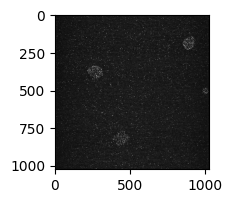

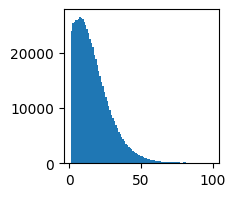

In [45]:
# if you want to plot
%matplotlib inline

i = 20
print(ys[i][0])
plt.figure(figsize=(2,2))
plt.imshow(ys[i][1], vmin=pixel_min, vmax=pixel_max, cmap='gray')

plt.figure(figsize=(2,2))
plt.hist(ys[i][1].flatten(), np.arange(pixel_min,pixel_max))